---
title: Estimation for the AR(1) model
---

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Let us explore estimation and inference for the AR(1) model using the US population dataset. 

### US Population Dataset

  observation_date  POPTHM
0       1959-01-01  175818
1       1959-02-01  176044
2       1959-03-01  176274
3       1959-04-01  176503
4       1959-05-01  176723
799


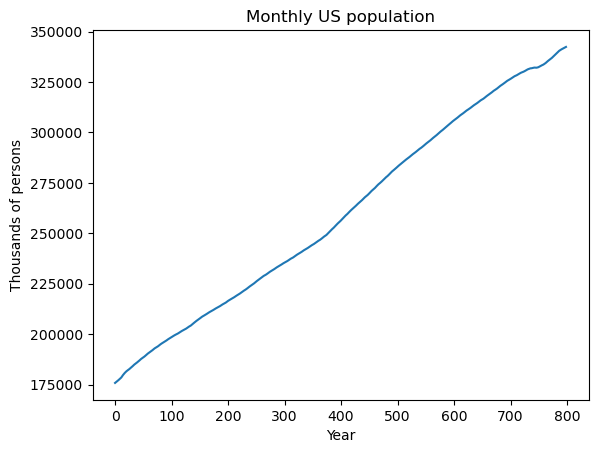

In [59]:
#US Population Dataset from FRED
uspop = pd.read_csv('POPTHM_01September2025.csv')
print(uspop.head())
y = uspop['POPTHM'].to_numpy()
n = len(y)
print(n)
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Thousands of persons')
plt.title('Monthly US population')
plt.show()

We can fit the AR(1) model to this dataset by just creating $y$ and $X$, and then regression $y$ on $X$ in the usual way. This is inference based on the posterior $t$-distribution (just as in linear regression), and this can be justified in the case of the AR model if we use Bayesian inference (and assume that $y_1$ is treated as a constant). 

In [61]:
p = 1
n = len(y)
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])

armod = sm.OLS(yreg, Xmat).fit()
print(armod.params)
print(armod.summary())

[227.60622785   0.99992728]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.390e+08
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:25:11   Log-Likelihood:                -4272.5
No. Observations:                 798   AIC:                             8549.
Df Residuals:                     796   BIC:                             8558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.6062   

The standard errors corresponding to the coefficients $\phi_0$ and $\phi_1$ are computed as the square roots of the diagonal entries of $\hat{\sigma}^2 (X^T X)^{-1}$ where 
\begin{equation*}
    \hat{\sigma} := \sqrt{\frac{RSS}{n-3}}. 
\end{equation*}
This is demonstrated below.

In [64]:
#parameter standard errors are calculated as follows:
resdf = n - 2*p - 1
sigols = np.sqrt(np.sum(armod.resid ** 2) / resdf)
print(sigols)
covmat_ols = (sigols ** 2) * np.linalg.inv(np.dot(Xmat.T, Xmat))
print(np.sqrt(np.diag(covmat_ols)))
print(armod.bse)

51.22875020334116
[9.72771663e+00 3.67824136e-05]
[9.72771663e+00 3.67824136e-05]


There is a specialized function in statsmodels for fitting AR(p) models. It is called AutoReg. Instead of creating $y$ and $X$ and then using OLS, we can fit AR(p) model directly using the AutoReg function. However this method uses frequentist inference so it is based on the normal distrbution (and asymptotic arguments) as opposed to the $t$-distribution. 

In [63]:
from statsmodels.tsa.ar_model import AutoReg
armod_sm = AutoReg(y, lags = p, trend = 'c').fit()
print(armod_sm.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  799
Model:                     AutoReg(1)   Log Likelihood               -4272.480
Method:               Conditional MLE   S.D. of innovations             51.165
Date:                Tue, 28 Oct 2025   AIC                           8550.960
Time:                        16:25:14   BIC                           8565.006
Sample:                             1   HQIC                          8556.356
                                  799                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.6062      9.716     23.427      0.000     208.564     246.648
y.L1           0.9999   3.67e-05   2.72e+04      0.000       1.000       1.000
                                    Roots           

Note that the estimates of $\phi_0$ and $\phi_1$ in AutoReg are exactly the same as in OLS. What about standard errors?

In [65]:
print(armod_sm.bse)
print(armod.bse)

[9.71551886e+00 3.67362914e-05]
[9.72771663e+00 3.67824136e-05]


The standard errors are similar but different. These standard are calculated by the square roots of the diagonal entries of $\hat{\sigma}^2_{\text{MLE}} (X^T X)^{-1}$ where $\hat{\sigma}_{\text{MLE}}$ is $\sqrt{RSS/(n-1)}$. The only difference between these standard errors and those reported by OLS is the use of $\hat{\sigma}_{\text{MLE}}$ as opposed to $\hat{\sigma}$. 

In [66]:
sighat = np.sqrt(np.mean(armod.resid ** 2))
print(sighat)
covmat_autoreg = (sighat ** 2) * np.linalg.inv(np.dot(Xmat.T, Xmat))
print(np.sqrt(np.diag(covmat_autoreg)))
print(armod_sm.bse)

51.16451350070432
[9.71551886e+00 3.67362914e-05]
[9.71551886e+00 3.67362914e-05]


We will see more about AR(1) fitting (and the differences between the stationary and non-stationary AR(1)) in the next lecture. 